In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import networkx as nx

def load_csv_data():
    data = pd.read_csv('packet-capture3.csv')
    return data

data = load_csv_data()
data = data[ data['Source'].isin(data['Source'].value_counts().head(30).index) ] 
data = data.drop('No.', axis=1)
data

,Time,Source,Destination,Protocol,Length,Info
0,0.000000,10.20.0.165,209.85.143.19,TCP,62,1698 > 443 [SYN] Seq=0 Win=65535 Len=0 MSS=1...
1,0.017691,209.85.143.19,10.20.0.165,TCP,62,"443 > 1698 [SYN, ACK] Seq=0 Ack=1 Win=5720 L..."
2,0.017729,10.20.0.165,209.85.143.19,TCP,54,1698 > 443 [ACK] Seq=1 Ack=1 Win=65535 Len=0
3,0.018382,10.20.0.165,209.85.143.19,SSLv3,156,Client Hello
4,0.032859,209.85.143.19,10.20.0.165,TCP,60,443 > 1698 [ACK] Seq=1 Ack=103 Win=5720 Len=0
...,...,...,...,...,...,...
9380,833.452154,10.20.0.165,10.20.0.130,SMB,180,"Tree Connect AndX Request, Path: \\\\WIN-JIDID..."
9382,833.458302,10.20.0.165,10.20.0.130,SMB,130,"Trans2 Request, GET_DFS_REFERRAL, File:"
9384,833.557382,10.20.0.165,10.20.0.130,SMB,156,"Trans2 Request, GET_DFS_REFERRAL, File: \\bhra..."
9386,833.558091,10.20.0.165,10.20.0.130,SMB,148,"Trans2 Request, GET_DFS_REFERRAL, File: \\BHRA..."


In [ ]:
data['Time_in_seconds'] = data['Time'].apply(np.floor)

packets_per_second = data.groupby('Time_in_seconds').size()

plt.figure(figsize=(20,10))
plt.plot(packets_per_second.index, packets_per_second.values, label='Packets per Second')
plt.xlabel('Seconds')
plt.ylabel('Total Number of Packets')
plt.title('Number of Packets Sent Over Time')
plt.grid(True)
plt.legend()
plt.show()

In [ ]:
uniqueProtocol = data['Protocol'].value_counts()

fig = plt.figure(figsize=(12, 5))
plt.bar(data['Protocol'].values, data['Protocol'].index, color='maroon', width=0.4)

plt.xlabel("Protocol")
plt.ylabel("Count")
plt.title("Count of Protocol types")
plt.show()



In [ ]:
x = data['Source']
y = data['Destination']

plt.figure(figsize=(20,10))
plt.scatter(x, y)
plt.show()

In [ ]:
import networkx as nx
import itertools

G = nx.DiGraph()

for index, row in data.iterrows():
    G.add_edge(row['Source'], row['Destination'])


plt.figure(figsize=(20, 20))

pos = nx.spring_layout(G, k=0.5, iterations=50)

nx.draw(G, pos, with_labels=True, node_size=5000, node_color="skyblue", font_size=10, font_weight="bold", edge_color="gray", linewidths=1, arrowsize=15)

plt.title('Node Link Diagram of Source and Destination')
plt.show()


In [32]:
protocols = data['Protocol'].unique()

for protocol in protocols:
    data[protocol] = data['Protocol'] == protocol

data.head()

,Time,Source,Destination,Protocol,Length,Info,Time_in_seconds,ProtocolCount,TCP,SSLv3,SSDP,DNS,HTTP,HTTP/JSON,IGMPv2,SSLv2,PKIX-CRL,BROWSER,ICMP,SMB
0,0.000000,10.20.0.165,209.85.143.19,TCP,62,1698 > 443 [SYN] Seq=0 Win=65535 Len=0 MSS=1...,0.0,8932,True,False,False,False,False,False,False,False,False,False,False,False
1,0.017691,209.85.143.19,10.20.0.165,TCP,62,"443 > 1698 [SYN, ACK] Seq=0 Ack=1 Win=5720 L...",0.0,8932,True,False,False,False,False,False,False,False,False,False,False,False
2,0.017729,10.20.0.165,209.85.143.19,TCP,54,1698 > 443 [ACK] Seq=1 Ack=1 Win=65535 Len=0,0.0,8932,True,False,False,False,False,False,False,False,False,False,False,False
3,0.018382,10.20.0.165,209.85.143.19,SSLv3,156,Client Hello,0.0,8932,False,True,False,False,False,False,False,False,False,False,False,False
4,0.032859,209.85.143.19,10.20.0.165,TCP,60,443 > 1698 [ACK] Seq=1 Ack=103 Win=5720 Len=0,0.0,8932,True,False,False,False,False,False,False,False,False,False,False,False


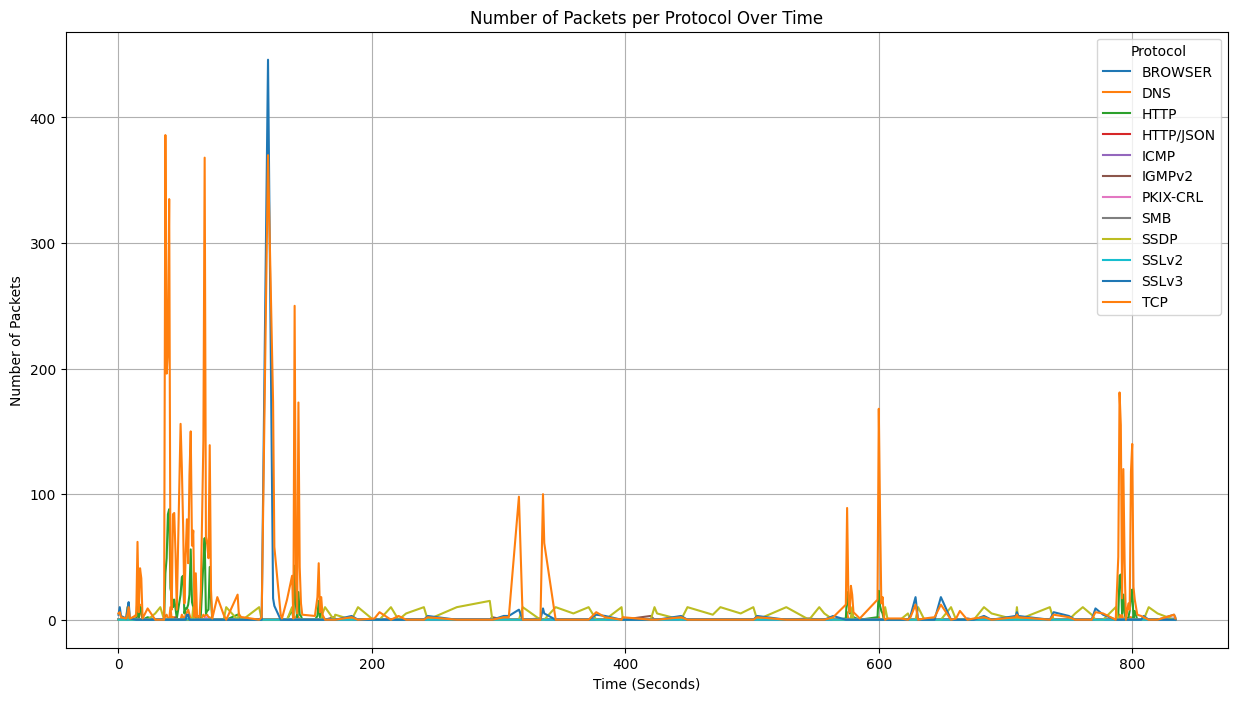

In [33]:
data['Time'] = data['Time'].round(0)

protocol_counts = data.groupby(['Time', 'Protocol']).size().unstack(fill_value=0)

plt.figure(figsize=(15, 8))

for protocol in protocol_counts.columns:
    plt.plot(protocol_counts.index, protocol_counts[protocol], label=protocol)

plt.title('Number of Packets per Protocol Over Time')
plt.xlabel('Time (Seconds)')
plt.ylabel('Number of Packets')
plt.legend(title="Protocol")
plt.grid(True)
plt.show()